In [5]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#loading the data from csv file
data = pd.read_csv("housing.csv")

In [7]:
#observing the data
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
#data exploration
data.info()

#in this dataset we have unequal number datasets i.e  no. of total bedrooms is not equal to total rooms and other datas
#to carry out the calculation we need to make the number of datasets equal so we can drop the null datasets so we can get only non-null value which eventually will be equal no. of datas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
#return data with only non-null value or in other words drop the data having null value
#"inplace=True permanently saves the edited data from the function dropna()"
data.dropna(inplace=True)



In [10]:
data.info()
#after dropping null values we get equal no. of data count of each class of data so that we can further continue our calculation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [11]:
#defining X and Y as known and unknown datasets simulteanously
from sklearn.model_selection import train_test_split

#X will be the dataframe without the target variable i.e median_house_value
X = data.drop(['median_house_value'], axis=1)

#Y is only going to be median house value(which we need to find)
y = data['median_house_value']

In [12]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [13]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [14]:
#splitting training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [15]:
#now we are going to join x_training_data and y_training_data so that we can observe some correlation between x and y.
train_data = X_train.join(y_train)

In [16]:
#here we can see the combined xy dataset
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10052,-121.04,39.19,17.0,856.0,167.0,518.0,170.0,3.5859,INLAND,144300.0
13038,-121.16,38.67,21.0,6198.0,1223.0,2827.0,1179.0,3.7796,INLAND,159000.0
15781,-122.41,37.77,52.0,1963.0,565.0,1628.0,524.0,2.6083,NEAR BAY,193800.0
11271,-117.99,33.79,21.0,2695.0,707.0,1888.0,683.0,3.2857,<1H OCEAN,213300.0
4126,-118.21,34.14,44.0,1681.0,407.0,1105.0,387.0,3.2222,<1H OCEAN,186500.0
...,...,...,...,...,...,...,...,...,...,...
795,-122.08,37.64,23.0,1897.0,440.0,1109.0,418.0,3.1420,NEAR BAY,179500.0
16119,-122.46,37.78,52.0,2165.0,580.0,1067.0,530.0,2.9293,NEAR BAY,350000.0
12429,-116.25,33.68,16.0,926.0,189.0,238.0,118.0,3.0114,INLAND,366700.0
19172,-122.67,38.44,29.0,2551.0,448.0,1165.0,456.0,4.3587,<1H OCEAN,196400.0


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

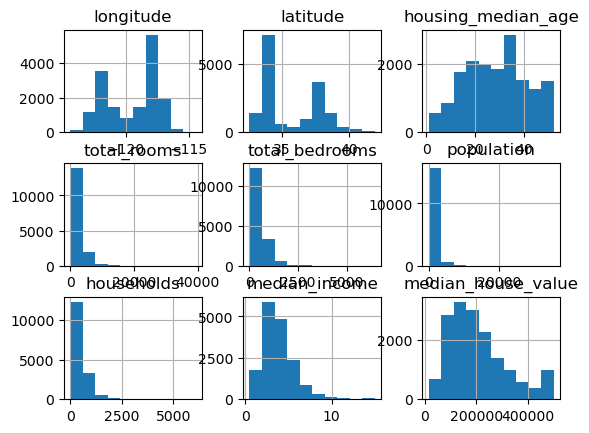

In [17]:
#let's see the histogram of the datasets
train_data.hist()

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

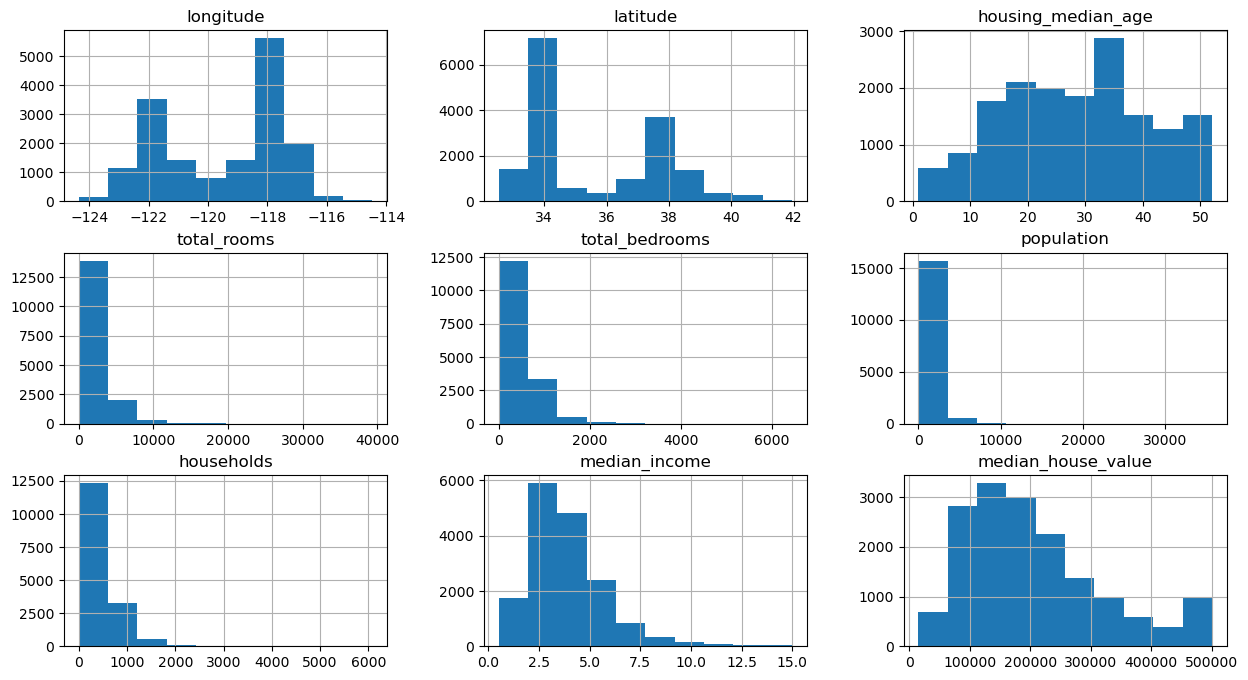

In [18]:
#here we can see the datasets and the target variable in graphical manner
train_data.hist(figsize=(15,8))

In [19]:
#correlation of datasets with the target variable
#correlation matrix
train_data.corr()

/tmp/ipykernel_4055/3846974952.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924650,-0.106447,0.039620,0.065196,0.093750,0.051771,-0.019031,-0.044620
latitude,-0.924650,1.000000,0.007754,-0.031287,-0.063100,-0.102684,-0.067485,-0.075362,-0.144820
housing_median_age,-0.106447,0.007754,1.000000,-0.361037,-0.319282,-0.292889,-0.302497,-0.124700,0.102600
total_rooms,0.039620,-0.031287,-0.361037,1.000000,0.931611,0.856485,0.919653,0.197368,0.132350
total_bedrooms,0.065196,-0.063100,-0.319282,0.931611,1.000000,0.876833,0.979633,-0.006851,0.050695
population,0.093750,-0.102684,-0.292889,0.856485,0.876833,1.000000,0.906374,0.004804,-0.026247
households,0.051771,-0.067485,-0.302497,0.919653,0.979633,0.906374,1.000000,0.013561,0.065452
median_income,-0.019031,-0.075362,-0.124700,0.197368,-0.006851,0.004804,0.013561,1.000000,0.686126
median_house_value,-0.044620,-0.144820,0.102600,0.132350,0.050695,-0.026247,0.065452,0.686126,1.000000


/tmp/ipykernel_4055/2824903505.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<AxesSubplot: >

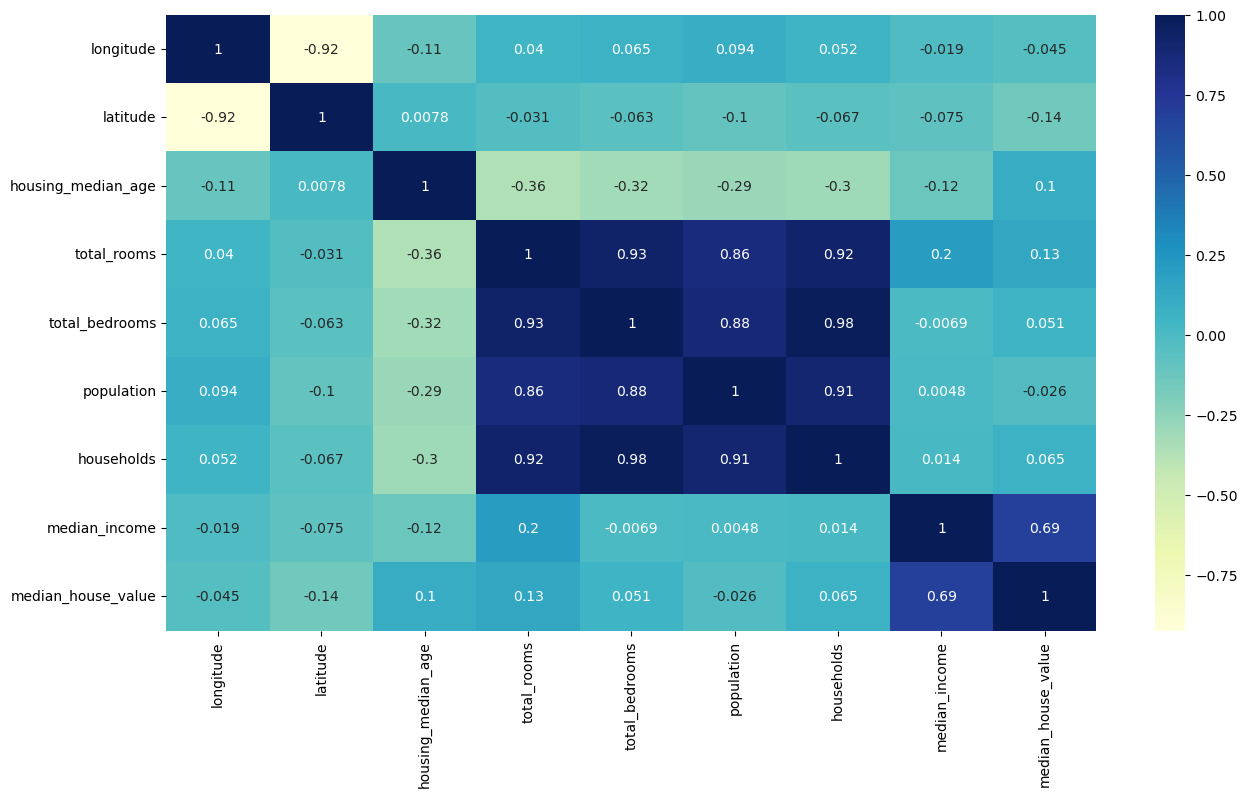

In [20]:
#plotting the above correlation matrix in heatmap
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
#where annot=annotation, cmap=colormap, YlGnBu=Yellow Green Blue
#we can see that the correlation of median_houe_value with other datasets which is the main goal of our data exploration
#for example longitude and latitude are negatively correlated, total_rooms is positively correlated with the median_house_value
#this is enough data exploration for this dataset for further calculations

In [21]:
#applying log distribution to the skewed datasets i.e total_rooms, total_bedrooms, population, households to normalize the data distribution
#By applying log on the x-axis, the skewness of datasets is converted to normal distribution of data.
#when the data is always positive it is most likely to end up in skewed distribution
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

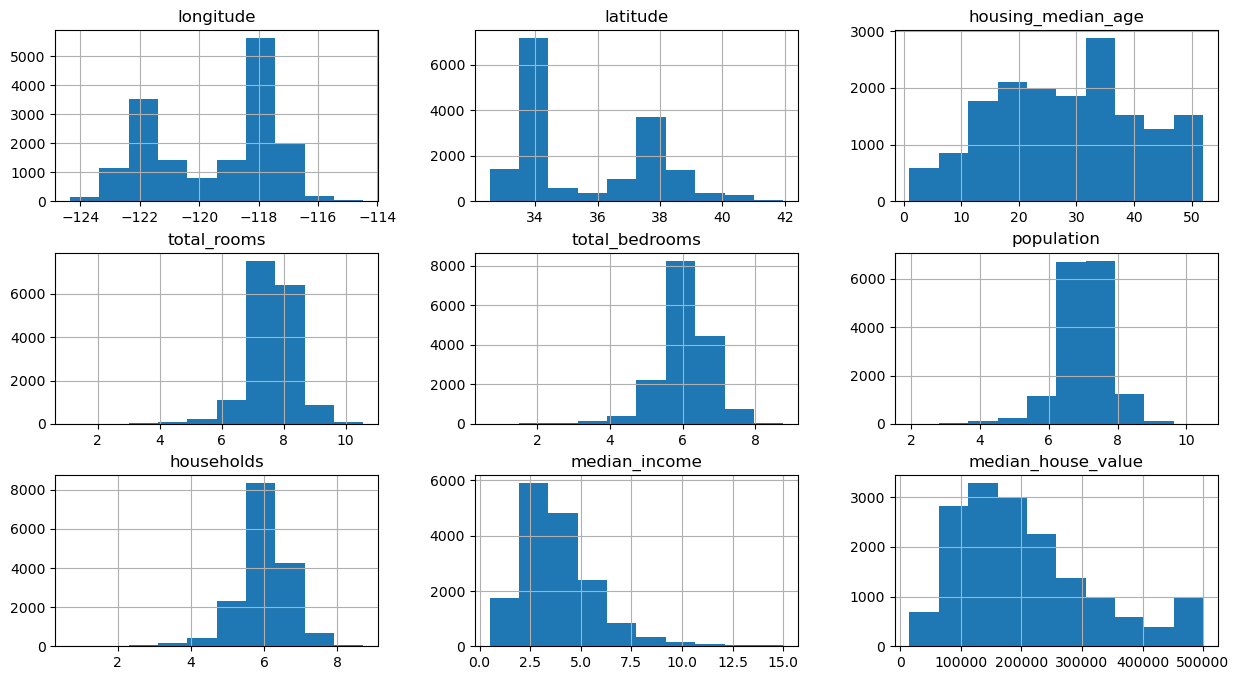

In [22]:
train_data.hist(figsize = (15,8))

In [23]:
#as we have discrete data values in ocean proximity, counting the discrete data of ocean proximity
train_data.ocean_proximity.value_counts()

<1H OCEAN     7261
INLAND        5177
NEAR OCEAN    2077
NEAR BAY      1828
ISLAND           3
Name: ocean_proximity, dtype: int64

In [24]:
#now we need to create the dummy rows to represent the <1H_ocean, INLAND, NEAR_OCEAN, NEAR_BAY, ISLAND, IN BINARY
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10052,0,1,0,0,0
13038,0,1,0,0,0
15781,0,0,0,1,0
11271,1,0,0,0,0
4126,1,0,0,0,0
...,...,...,...,...,...
795,0,0,0,1,0
16119,0,0,0,1,0
12429,0,1,0,0,0
19172,1,0,0,0,0


In [25]:
#joining the dummy table with the original training data
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [26]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10052,-121.04,39.19,17.0,6.753438,5.123964,6.251904,5.141664,3.5859,144300.0,0,1,0,0,0
13038,-121.16,38.67,21.0,8.732143,7.109879,7.947325,7.073270,3.7796,159000.0,0,1,0,0,0
15781,-122.41,37.77,52.0,7.582738,6.338594,7.395722,6.263398,2.6083,193800.0,0,0,0,1,0
11271,-117.99,33.79,21.0,7.899524,6.562444,7.543803,6.527958,3.2857,213300.0,1,0,0,0,0
4126,-118.21,34.14,44.0,7.427739,6.011267,7.008505,5.961005,3.2222,186500.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-122.08,37.64,23.0,7.548556,6.089045,7.012115,6.037871,3.1420,179500.0,0,0,0,1,0
16119,-122.46,37.78,52.0,7.680637,6.364751,6.973543,6.274762,2.9293,350000.0,0,0,0,1,0
12429,-116.25,33.68,16.0,6.831954,5.247024,5.476464,4.779123,3.0114,366700.0,0,1,0,0,0
19172,-122.67,38.44,29.0,7.844633,6.107023,7.061334,6.124683,4.3587,196400.0,1,0,0,0,0


<AxesSubplot: >

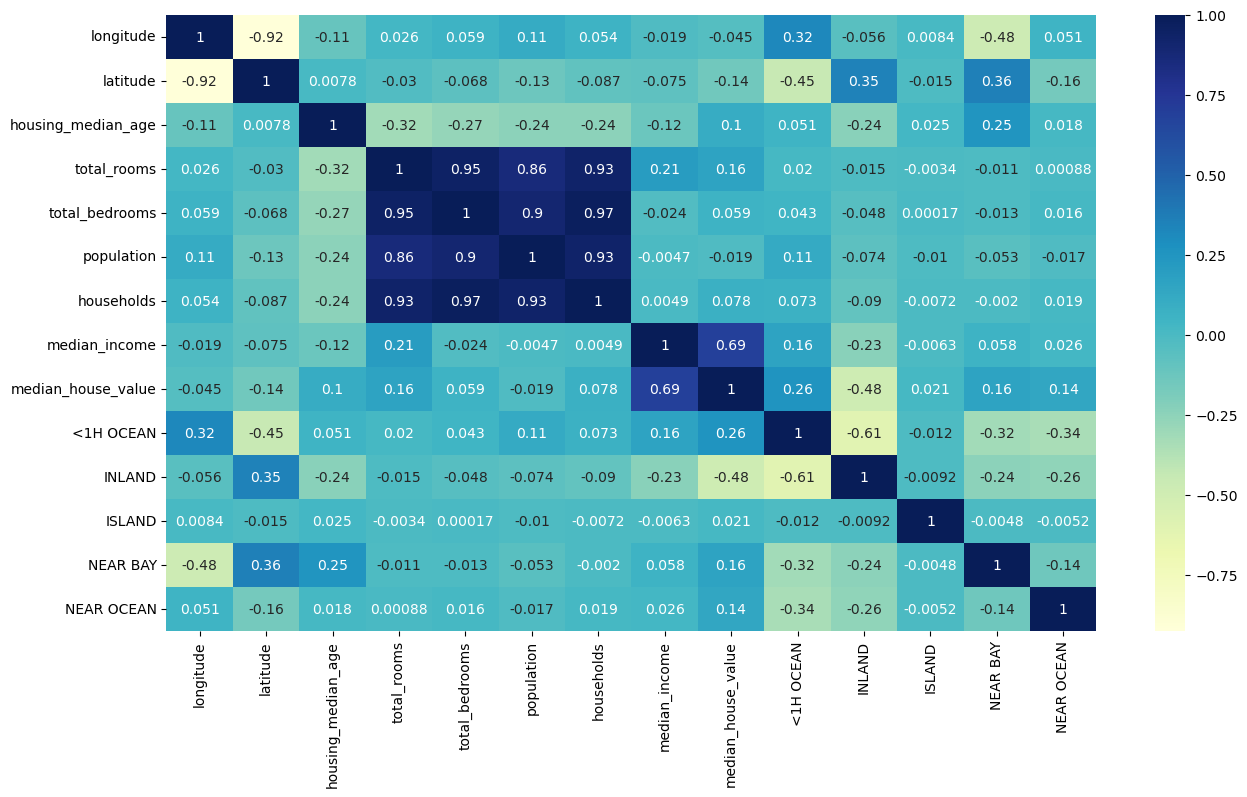

In [27]:
#again visualizing the data using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

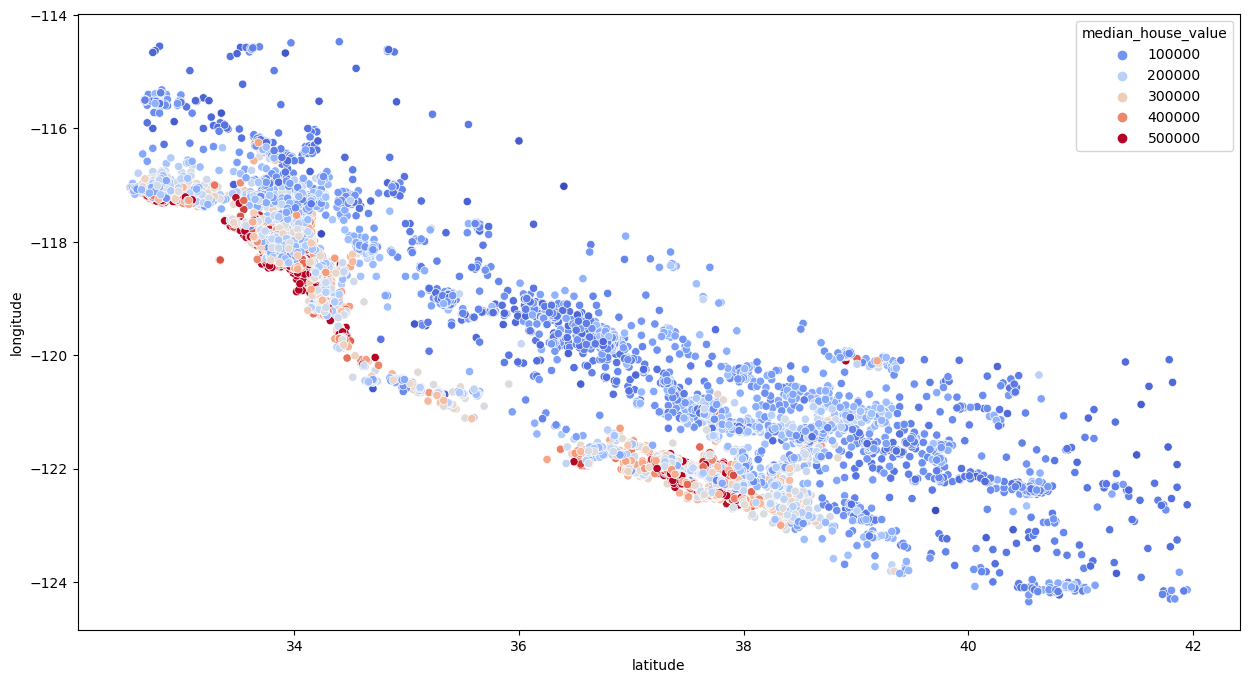

In [28]:
#drawing the map of the position of the houses according to the latitude and longitude 
#drawing scatterplot
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")
#the more red it gets, more expensive the house is and the more blue it gets more cheap the house is.

In [35]:
#feature engineering(modifying or adding features)
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


<AxesSubplot: >

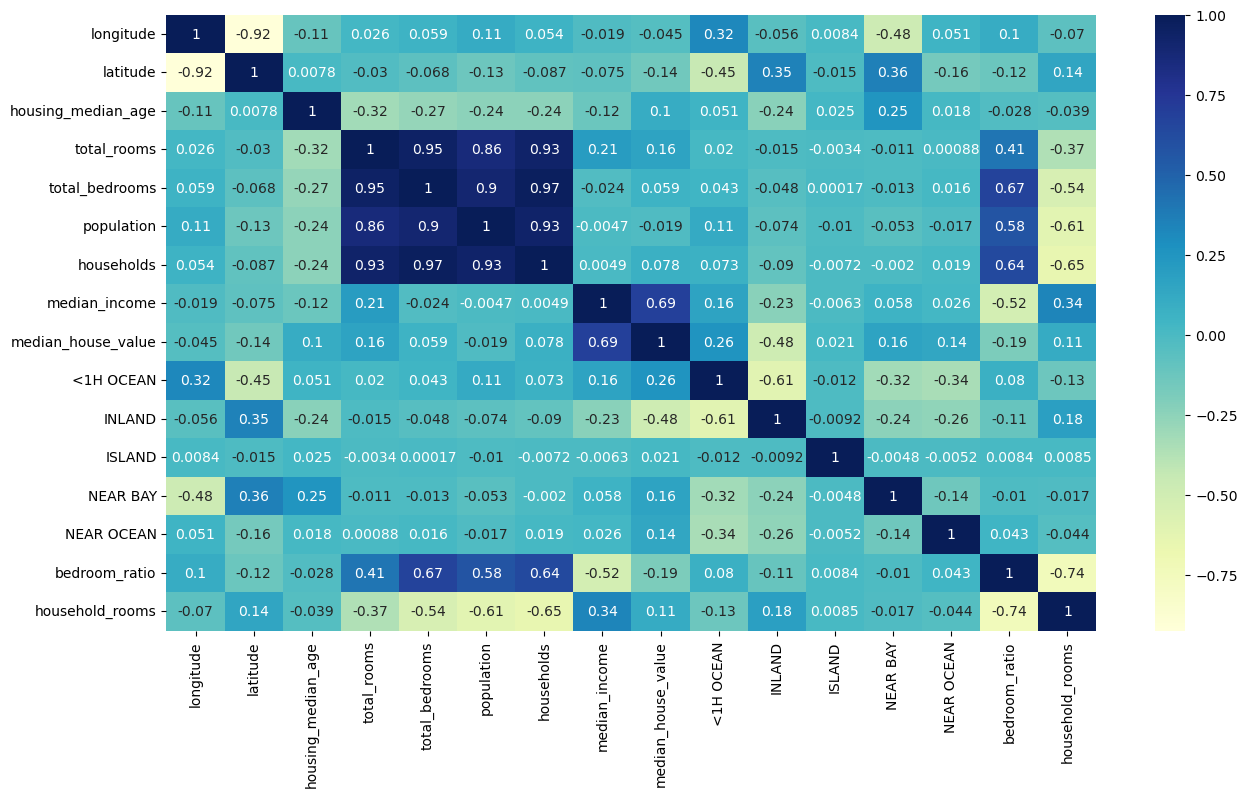

In [36]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')